# Cluster analysis comparison

### Input files:
1. *shap_genes.pkl*
2. *Limma_genes.pkl* (Or other gene sets generated by different methods)
3. *filtered_genes.pkl*
4. *Filtered_Maize_expression.csv*


### Output files:
1. *Fig1.svg*
2. *Fig2.svg*
3. *Fig3.svg*
4. *Fig4.svg*
5. *Fig5.svg*
6. *Fig6.svg*
7. *shap_kmeans.pkl*
 
### Table of contents:
1. [Import Modules](#1.-Import-Modules)  
2. [Set static paths](#2.-Set-static-paths)  
3. [Load files](#3.-Load-files)  
    3.1 [Load genes](#3.1-Load-genes)  
    3.2 [Load test data](#3.1-Load-test-data)  
4. [Process data](#4.-Process-data)  
    4.1 [Transform data](#4.1-Transform-data)  
    4.2 [Filter genes](#4.2-Filter-genes)  
5. [Plot clusters](#5.-Plot-clusters)  
6. [Measure clustering](#6.-Measure-clustering)  
    6.1 [Calculate kmeans](#6.1-Calculate-kmeans)  
    6.2 [Plot V-measure](#6.2-Plot-V-measure)  
7. [Save out results](#6.-Save-out-results)  

## 1. Import Modules

In [55]:
import pandas as pd
import numpy as np
import pickle
import os

In [56]:
os.chdir('../notebooks')

In [57]:
Maize_matrix = pd.read_csv('2Filtered_Maize_expression.csv', index_col=0)

In [58]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(Maize_matrix,test_size = 0.2)

In [59]:
import os

In [60]:
util_path = '../src'
os.chdir(util_path)

In [61]:
import pandas as pd
import pickle
from tqdm import tqdm
from cluster import get_random_gene_df, get_kmeans_dict, get_p_value
from vis import plot_umap
from modelling.cnn import log_transform
import statistics 
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(11.7,8.27)})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. Set static paths

In [62]:
data_type = "imbalanced"
data_dir = "../data/"

In [63]:
input_dir = data_dir + "processed/"
gene_dir = data_dir + "gene_lists/"
fig_dir = "../figures/"
output_dir = data_dir + "processed/"

## 3. Load files

#### 3.1 Load genes

In [64]:
## SHAP genes
with open(gene_dir + "shap_genes.pkl", "rb") as f:
    shap_genes = pickle.load(f)

#### Other gene sets could be added
# ## Limma genes
# with open(gene_dir + "Limma_genes.pkl", "rb") as f:
#     edger_genes = pickle.load(f)
    
filtered_genes = Maize_matrix.iloc[:,0:-1].keys()

#### 3.2 Load test data

In [65]:
test_data = test

## 4. Process data

#### 4.1 Transform data

In [66]:
test_data = log_transform(test_data, label=True)

#### 4.2 Filter genes

In [67]:
# SHAP-selected genes
shap_df = test_data.loc[:, shap_genes]
shap_df["tissue"] = test_data.loc[:, "tissue"]

# # # Limma-selected genes
# Limma_df = test_data.loc[:, edger_genes]
# Limma_df["tissue"] = test_data.loc[:, "tissue"]

# fullset genes
full_df = test_data.loc[:, filtered_genes]
full_df["tissue"] = test_data.loc[:, "tissue"]

In [68]:
random_df = get_random_gene_df(test_data, 2423)

/root/GradientExplainer-RNAseq-master_wzj/src/cluster.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_df_rand["tissue"] = labels


## 5. Plot clusters

In [69]:
shap_df.drop("tissue", axis=1)

,Zm00001d001766,Zm00001d001772,Zm00001d001774,Zm00001d001779,Zm00001d001784,Zm00001d001785,Zm00001d001786,Zm00001d001787,Zm00001d001791,Zm00001d001797,...,Zm00001d054071,Zm00001d054072,Zm00001d054074,Zm00001d054076,Zm00001d054080,Zm00001d054081,Zm00001d054089,Zm00001d054094,Zm00001d054106,Zm00001d054107
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
SRR7469553,16.764327,13.968609,17.927558,8.262808,13.674378,15.018401,14.540393,14.150473,13.454134,13.525569,...,8.903566,10.132502,13.144631,12.548417,14.031717,10.147116,15.658750,8.278970,13.820886,16.435763
SRR7469491,18.196023,15.485463,18.635620,14.047138,15.446713,10.068638,11.618225,13.604063,9.664911,11.888482,...,11.984652,10.781386,14.748856,10.576168,11.790503,0.034216,14.058900,0.034216,12.612424,15.566934
SRR1770369,11.414772,7.403115,10.995043,7.840379,9.094490,14.243793,15.424303,13.633113,7.526397,14.244422,...,9.827021,12.561537,0.034216,14.772074,11.899014,12.239809,16.987408,0.034216,16.380068,16.975553
SRR13178404,0.034216,5.448385,9.422965,16.661655,8.760482,9.078618,11.534188,13.681189,0.034216,12.432368,...,0.034216,0.034216,10.910832,9.797348,0.034216,0.034216,15.681430,0.034216,12.654629,15.314952
SRR13332788,8.600304,0.034216,0.034216,0.034216,9.875948,8.669785,0.034216,12.999850,9.503680,11.341895,...,0.034216,9.897552,0.034216,11.319912,0.034216,0.034216,14.063075,0.034216,9.438825,12.851794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR7469507,16.859591,13.737359,16.527353,0.034216,14.275058,6.136160,11.765631,13.488029,6.446692,11.504197,...,11.541427,9.523004,11.100073,10.869945,7.305725,8.777461,12.841198,0.034216,12.803707,14.914172
SRR13587902,15.197459,12.116875,10.531559,9.350454,7.773652,17.112048,14.886287,15.568025,10.690157,14.580206,...,12.831710,13.604482,12.077384,14.855267,14.771087,0.034216,16.240248,15.240107,16.172038,17.640252
SRR572022,12.326183,12.121741,11.545017,7.001257,10.297553,14.805101,11.327499,13.732567,7.192684,12.030549,...,7.185872,12.661201,0.034216,13.528870,12.163676,0.034216,15.990149,7.791372,14.973870,17.299493


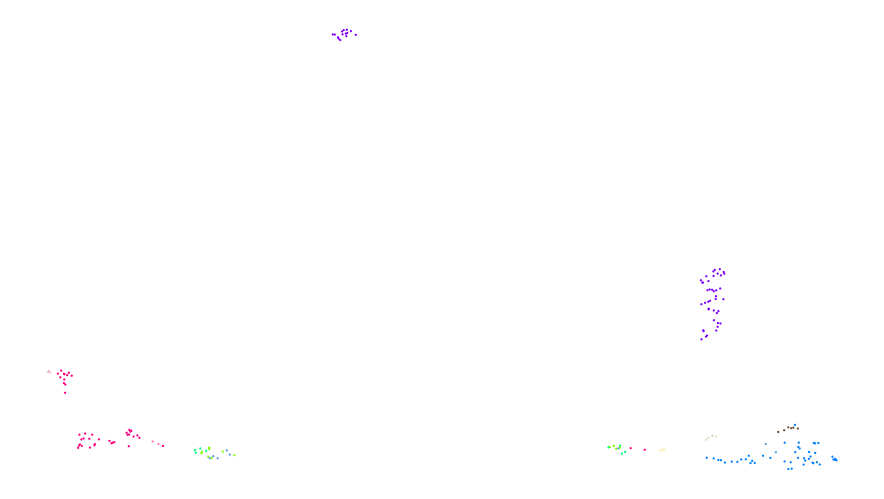

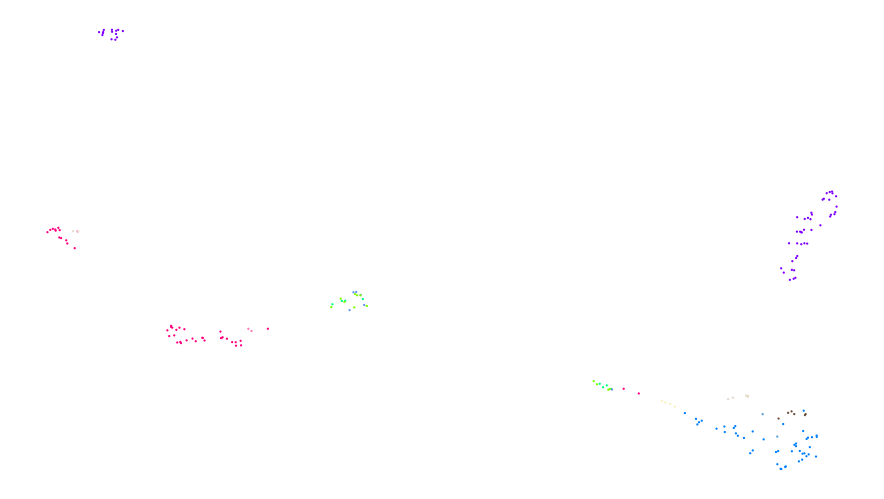

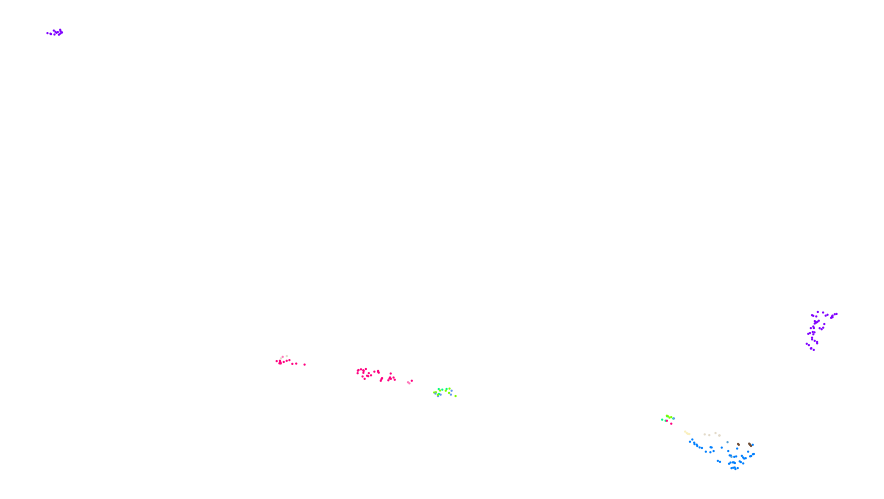

In [70]:
random_list = []
# SHAP UMAP
shap_umap_df = plot_umap(
    shap_df,
    "Fig1",
    fig_dir,
    label_col="tissue",
    seed=42,
)

# #  Limma UMAP
# edger_umap_df = plot_umap(
#     Limma_df,
#     "Fig2",
#     fig_dir,
#     label_col="tissue",
#     seed=42,
# )

# FULL UMAP
full_umap_df = plot_umap(
    full_df,
    "Fig3",
    fig_dir,
    label_col="tissue",
    seed=42,
)

# RANDOM SHAP UMAP
rand_shap_umap_df = plot_umap(
    random_df,
    "Fig4",
    fig_dir,
    label_col="tissue",
    seed=42,
)
random_list.append(rand_shap_umap_df)

for i in range(9):
    rand_shap_umap_df = plot_umap(
        random_df,
        "Fig5",
        fig_dir,
        label_col="tissue",
        seed=42,
        save_plot=False
    )
    random_list.append(rand_shap_umap_df)

## 6. Measure clustering

#### 6.1 Calculate kmeans

In [71]:
kmeans_dict = {}
shap = []
edger = []
fullset = []
random_shap_dict = {
    0:[],
    1:[],
    2:[],
    3:[],
    4:[],
    5:[],
    6:[],
    7:[],
    8:[],
    9:[]
}

In [72]:
for x in tqdm(range(5)):
    shap.append(get_kmeans_dict(shap_umap_df, "tissue"))
    # edger.append(get_kmeans_dict(edger_umap_df, "tissue"))
    fullset.append(get_kmeans_dict(full_umap_df, "tissue"))
    for i in range(5):
        random_shap_dict[i].append(get_kmeans_dict(random_list[i], "tissue"))

100%|██████████| 5/5 [00:02<00:00,  1.79it/s]


In [73]:
kmeans_dict["SHAP"] = shap
# kmeans_dict["Limma"] = Limma
kmeans_dict["All"] = fullset
for i in range(10):
    kmeans_dict[f"Random SHAP {i}"] = random_shap_dict[i]

In [74]:
random_shap_results = []
shap_results = pd.DataFrame.from_dict(kmeans_dict["SHAP"])
# edger_results = pd.DataFrame.from_dict(kmeans_dict["Limma"])
fullset_results = pd.DataFrame.from_dict(kmeans_dict["All"])
for i in range(5):
    random_shap_results.append(pd.DataFrame.from_dict(kmeans_dict[f"Random SHAP {i}"]))

In [75]:
# result_list = [shap_results, Limma_results, fullset_results]
result_list = [shap_results, fullset_results]

In [76]:
for i in range(5):
    result_list.append(random_shap_results[i])

In [77]:
# colour_map_rand = {"SHAP":"r", "Random (n=2423)":"lightgray",  "All Genes": "b", "Limma":"g"}
colour_map_rand = {"SHAP":"r", "Random (n=2423)":"lightgray",  "All Genes": "b"}

#### 6.2 Plot V-measure

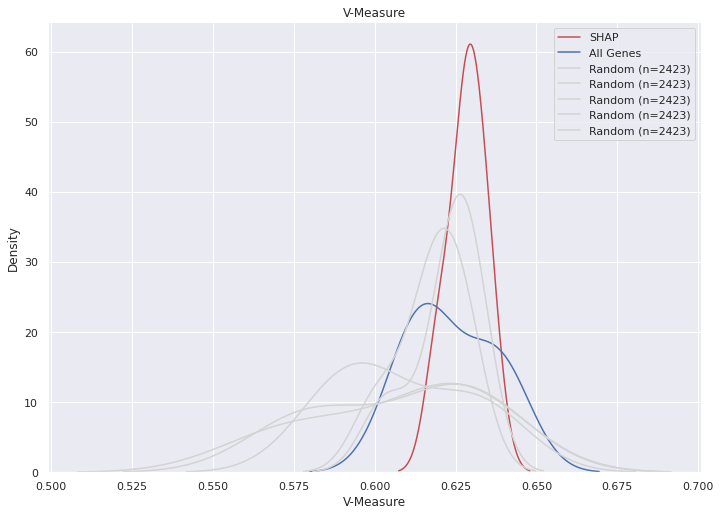

In [78]:
# df_labels = ["SHAP", "All Genes",  "Limma", "Random (n=2423)", "Random (n=2423)", "Random (n=2423)", "Random (n=2423)", "Random (n=2423)", "Random (n=2423)", "Random (n=2423)", "Random (n=2423)", "Random (n=2423)", "Random (n=2423)", "Random (n=2423)"]
df_labels = ["SHAP", "All Genes", "Random (n=2423)", "Random (n=2423)", "Random (n=2423)", "Random (n=2423)", "Random (n=2423)", "Random (n=2423)", "Random (n=2423)", "Random (n=2423)", "Random (n=2423)", "Random (n=2423)", "Random (n=2423)"]
metric = "V-Measure"
for ix, i in enumerate(result_list):
    sns.kdeplot(result_list[ix][metric], label=df_labels[ix], color=colour_map_rand[df_labels[ix]]).set_title(metric)
plt.legend()
sns.despine();
file_path = fig_dir+"Fig6.svg"
plt.savefig(file_path)

In [79]:
rand_mean = []
for i in range(5):
    rand_mean.append(random_shap_results[i]["V-Measure"].mean())

In [80]:
print("SHAP V-Measure:", round(shap_results["V-Measure"].mean(), 3))
# print("Limma V-Measure:", round(Limma_results["V-Measure"].mean(), 3))
print("All genes V-Measure:", round(fullset_results["V-Measure"].mean(), 3))
print("Random SHAP V-Measures:", round(min(rand_mean), 3), "-", round(max(rand_mean), 3))

SHAP V-Measure: 0.628
All genes V-Measure: 0.624
Random SHAP V-Measures: 0.607 - 0.622


## 7. Save out results

In [81]:
shap_results.to_pickle(output_dir+"shap_kmeans.pkl")